<a href="https://colab.research.google.com/github/xohit/Bpod_Gen2/blob/master/practicals/Practicals_1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicals for lecture 1.1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2025/blob/main/practicals/Practicals_1.1.ipynb)

## More on `numpy`

#### 1.1.0 Operations with arrays

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Create an array with a range of numbers from 1 to 10 (not from 0 to 9!),
# then elevate each element to the power of 2:
array = np.random.randint(1, 10, ((2,3)))
array**2

array([[25, 36, 25],
       [16, 16,  9]])

In [9]:
from typing_extensions import final
# Use np.stack to create a 10*10 matrix with rows of identical values going from 0 to 9, in this way:

# final_matrix = [[0,0,0,0,0,...],
#                 [1,1,1,1,1,...],
#                 [2,2,2,2,2,...],
#                 [.., .., .., ]]

# Hint: you can use a list comprehension to create the list of arrays to pass to np.stack()!

final_matrix = np.stack([np.zeros(10)+i for i in range(10)])
final_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [14]:
# you have the following data matrix:
data_matrix = np.array([[1,2,3, 2, 5, 0, 2],
                        [4,5,6, 8, 2, 3, 1]])

# And this array of offsets, one for every row:
offsets = np.array([2, 5])

# Use stack to repeat the offsets as many times as the number of columns in data_matrix,
# so that you can subtract offsets from each row of data_matrix:
offsets_repeated = np.stack([offsets]*data_matrix.shape[1], axis=1)
offsets_repeated
np.subtract(data_matrix, offsets_repeated)

array([[-1,  0,  1,  0,  3, -2,  0],
       [-1,  0,  1,  3, -3, -2, -4]])

In [22]:
my_arr = np.ones((4,3))
my_arr[:, 2:] = my_arr[:, 2:]*100
my_arr

array([[  1.,   1., 100.],
       [  1.,   1., 100.],
       [  1.,   1., 100.],
       [  1.,   1., 100.]])

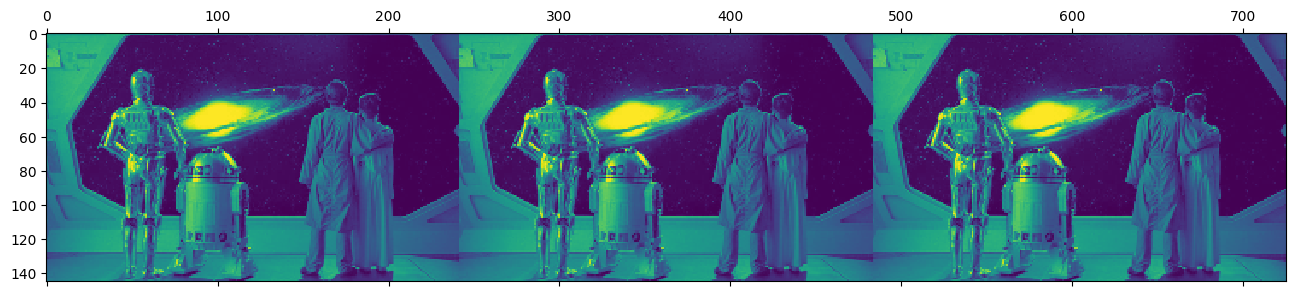

In [30]:
def fetch_image():
    import requests
    from io import BytesIO

    response = requests.get("https://github.com/vigji/python-cimec-2025/raw/main/practicals/data/correct_img.npy")

    return np.load(BytesIO(response.content))

img = fetch_image()

fetch_image()
# Start from the matrix you downloaded with the fetch_image() function above (same as last week practicals).
# Now use np.concatenate to repeat the matrix 2 times vertically, and 3 times horizontally.

img_list = [fetch_image(), fetch_image(), fetch_image()]
np.concatenate(img_list, axis=1)
# Hint: you will have to call np.concatenate twice to do it!
# Use plt.matshow() to check the result.
plt.matshow(np.concatenate(img_list, axis=1))

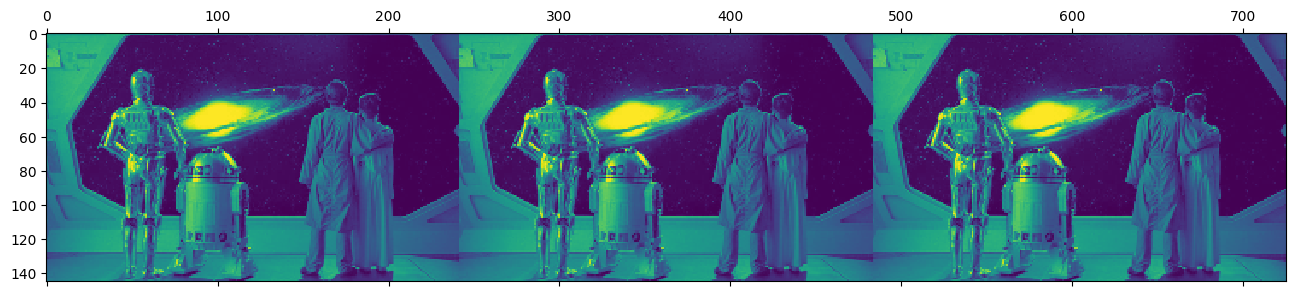

In [33]:
# Google (or chatGPT) how to use the np.tile() function to perform the same tiling using only one operation!
np.tile(img, (1, 3))
plt.matshow(np.tile(img, (1, 3)))


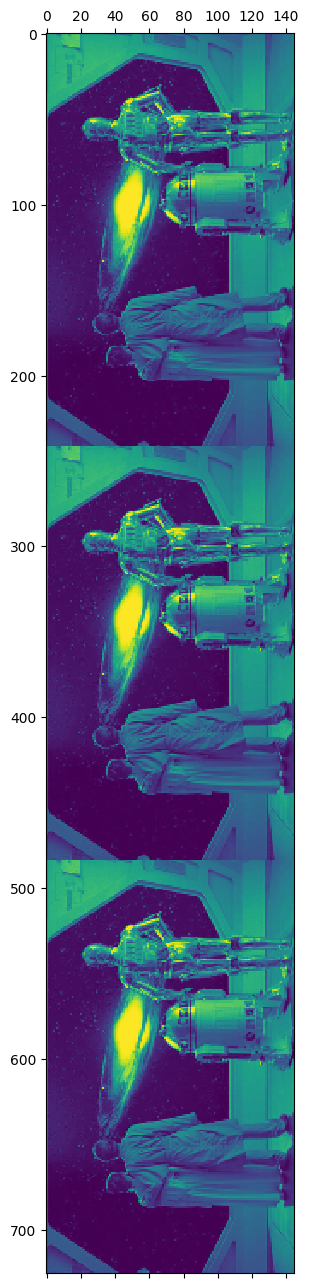

In [35]:
# use plt.matshow() to show the transposed image:
sw = np.tile(img, (1, 3)).T
plt.matshow(sw)

#### 1.1.1 Broadcasting

In [37]:
# Let's fix the offset subtraction above using broadcasting instead of stacking arrays!

# you have the following data matrix:
data_matrix = np.array([[1,2,3, 2, 5, 0, 2],
                        [4,5,6, 8, 2, 3, 1]])

# And this array of offsets, one for every row:
offsets = np.array([2, 5])

# We want to subtract the offsets from each row of data_matrix.

# Remember, to match arrays we need to have either matching dimension size, OR a dimension size of 1.
# Currently, numpy is comparing second dimension of data_matrix with first dimension of offsets,
# and they do not match.

# Use the syntax we have seen to add new singleton dimensions to convert offsets to an array
# of shape (2, 1), and then use it to try the operation again, so that numpy can broadcast the subtraction:
new_offset = offsets[:, np.newaxis]
print(new_offset.shape)
data_matrix - offsets[:, np.newaxis]


(2, 1)


array([[-1,  0,  1,  0,  3, -2,  0],
       [-1,  0,  1,  3, -3, -2, -4]])

In [51]:
# Create a 3D array of shape (2, 3, 4) filled with random numbers between 0 and 1
threeD = np.random.rand(2, 3, 4)
print(threeD)
# Create a 1D array of shape (4,) with values [1, 2, 3, 4]
oneD = np.array([1, 2, 3, 4])
# Use broadcasting to multiply each element in the last dimension of the 3D array
# by the corresponding value in the 1D array:
threeD * oneD

[[[0.4173213  0.09415639 0.08891253 0.85740585]
  [0.31643868 0.78086769 0.63438489 0.3971958 ]
  [0.42279315 0.84040758 0.33301155 0.86757154]]

 [[0.50467061 0.31627455 0.68811848 0.21923335]
  [0.40054488 0.82060853 0.05498678 0.13026774]
  [0.36250817 0.23254666 0.69065368 0.86695377]]]


array([[[0.4173213 , 0.18831279, 0.26673759, 3.4296234 ],
        [0.31643868, 1.56173538, 1.90315466, 1.58878321],
        [0.42279315, 1.68081515, 0.99903465, 3.47028618]],

       [[0.50467061, 0.63254909, 2.06435545, 0.8769334 ],
        [0.40054488, 1.64121707, 0.16496035, 0.52107094],
        [0.36250817, 0.46509333, 2.07196105, 3.46781509]]])

In [53]:
# Create two arrays:
# - A 2D array of shape (3, 4) with random integers between 0 and 9

twoD = np.random.randint(0, 9, (3, 4))
# - A 1D array of shape (4,) with values [2, 4, 6, 8]

oneD = np.array([2, 4, 6, 8])
# Use broadcasting to create a boolean mask where each element in the 2D array
# is greater than the corresponding value in the 1D array
# Then use this mask to set all elements that are greater to 0

twoD[twoD > oneD] = 0
twoD

array([[0, 0, 2, 8],
       [0, 2, 0, 7],
       [0, 2, 6, 3]])

#### 1.1.2 Stats over numpy arrays

In [54]:
# Use np.random.normal to initialize a vector of 1000 numbers of mean 10 and standard deviation 3.
# Then calculate the actual mean and standard deviation of the array you got using numpy.
vector = np.random.normal(10, 3, 1000)
np.mean(vector), np.std(vector)

(np.float64(9.944081976496415), np.float64(2.9885823375523515))

In [59]:
# Exercise: this function generate sample Reaction Times data
# for many subjects. (200 subjects, 1000 RTs each)

def generate_RT_data(n_subjects=200, n_samples_per_subject=1000):
    """
    Generates Reaction Time data for a given number of subjects, each with their own distribution parameters.

    Parameters:
    n_subjects (int): Number of subjects
    n_samples_per_subject (int): Number of samples (RT times) per subject

    Returns:
    np.ndarray: A 2D array where each row represents the RT times for a subject
    """
    np.random.seed(0)  # For reproducibility
    shift = 0.500  # Shift of the distribution
    # Initialize an empty array to store the RT times for all subjects
    RT_data = np.empty((n_subjects, n_samples_per_subject))

    for i in range(n_subjects):
        # Assuming mu ranges from 90 to 110 and sigma from 10 to 20 for the subjects
        mu = np.random.uniform(0.090, 0.110)
        sigma = np.random.uniform(0.10, 0.20)
        RT_data[i] = np.random.normal(mu, sigma, n_samples_per_subject) + shift

    return RT_data

# This is our data matrix:
rt_data = generate_RT_data()
# Compute the mean of the RT times for each subject and store it in a reaction_time_means
# array. Rember to specify the axis along which you are taking the mean!

reaction_time_means = np.mean(rt_data, axis=1)
reaction_time_means

# Then, use broadcasting to subtract the mean RTs from the data.
# Bonus: then organize your code in a function for mean subtraction!

def mean_subtraction(data):
    means = np.mean(data, axis=1)
    return data - means[:, np.newaxis]

mean_subtraction(rt_data)

array([[ 0.17575725,  0.39224077,  0.32820671, ..., -0.05353819,
         0.10324328,  0.16096132],
       [-0.08480628,  0.0188379 ,  0.0430935 , ..., -0.25956707,
        -0.30321533, -0.33842669],
       [-0.00547473, -0.1001218 , -0.11028841, ...,  0.09319591,
        -0.01059036,  0.04502648],
       ...,
       [ 0.00622734, -0.0380322 ,  0.15360354, ..., -0.27414892,
         0.21570817,  0.14361678],
       [ 0.03082314, -0.1024064 ,  0.01538038, ..., -0.0338386 ,
         0.00319681, -0.10597887],
       [ 0.07324112,  0.1322291 ,  0.07778429, ...,  0.03069698,
        -0.02834325, -0.02973032]])

In [74]:
# RUN THIS CELL TO DOWNLOAD THE DATA

import numpy as np
from matplotlib import pyplot as plt
import requests
import json

def download_meteo_data(start_date="2022-01-01", end_date="2022-12-30",
                        latitude="45.88204", longitude="11.03647",
                        data="temperature_2m"):
    """Download meteo historical data from open-meteo.com.

    Parameters
    ----------
        start_date : str
            Beginning of time series.

        end_date : str
            End of time series.

        latitude : float
            Latitude of the time series.

        longitude : float
            Longitude of the time series.

        data : str
            Data to download. One of "temperature_2m", "relativehumidity_2m",
            "precipitation", "snowfall", "windspeed_10m".

    Returns
    -------
        np.array
            1D array of timestamps
        np.array
            1D array of data, sampled every hour (24 points per day)

    """
    BASE_URL = "https://archive-api.open-meteo.com/v1/"
    query = f"archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly={data}"

    r = requests.get(BASE_URL + query)
    json_dict = json.loads(r.text)

    if "hourly" not in json_dict.keys():
        print(json_dict)
        return None, None
    else:
        return np.array(json_dict["hourly"]["time"]).reshape(-1, 24), np.array(json_dict["hourly"][data]).reshape(-1, 24)

timestamps_array, temperatures_array = download_meteo_data()
temperatures_array


array([[4.4, 2.9, 3.2, ..., 3.8, 3.5, 3.6],
       [4.2, 2.6, 2.3, ..., 2.7, 2. , 1.9],
       [3. , 2.7, 2.1, ..., 2.5, 3.2, 2.9],
       ...,
       [4.3, 5.3, 3.2, ..., 4.7, 4.8, 4.5],
       [4.7, 3.2, 3. , ..., 6.7, 6.6, 6.7],
       [6.6, 6.4, 6.3, ..., 6.5, 6.7, 6.5]])

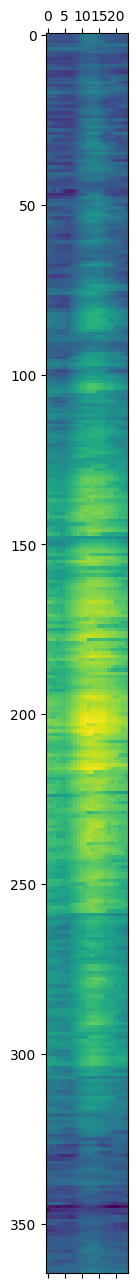

In [61]:
# Run the cell above to download an array of temperatures in Rovereto during 2022.
# Temperatures data are sampled every hour: can you interpret the shape of the array?

# Plot it with plt.matshow() to check if it makes sense.
plt.matshow(temperatures_array)

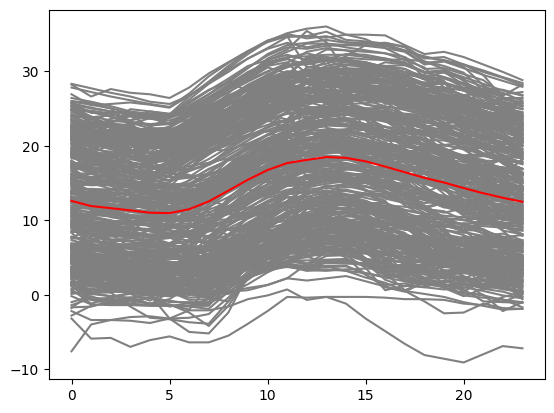

In [75]:
# Use plt.plot to show temperatures for all days (each day a line). You can do it in a for loop,
# or in one call of the function given the right dimension order for the data matrix!

# Compute the average temperature line over days, and plot it on top of the individual day lines.
plt.plot(temperatures_array.T, c='gray')
plt.plot(np.mean(temperatures_array, axis=0), c='red')
plt.show()
# (you can pass the `c` argument to specify line color.
# Make the lines of the individual days gray and the average red!)


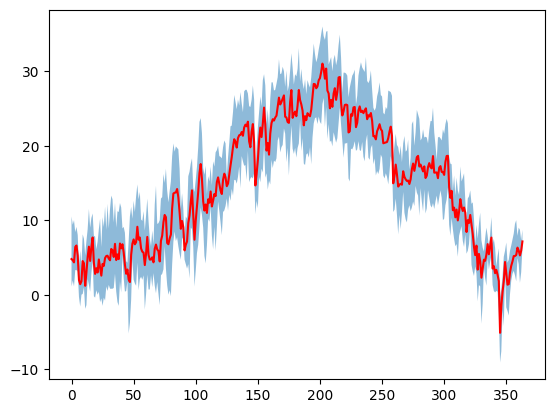

In [76]:
# From the temperatures data, create one-dimensional arrays with the minimum, mean and maximum temperatures
# of each day.

one_dim_min = np.min(temperatures_array, axis=1)
one_dim_mean = np.mean(temperatures_array, axis=1)
one_dim_max = np.max(temperatures_array, axis=1)
# Look into the documentation for the plt.fill_between() function, and use it to make a plot
# where you represent the temperature range for every day of the year.
plt.fill_between(range(len(one_dim_max)), one_dim_min, one_dim_max, alpha=0.5)
plt.plot(one_dim_mean, c='red')
plt.show()

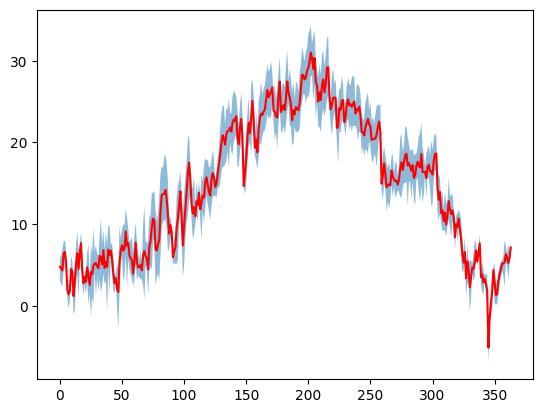

In [77]:
# Repeat the same, but now representing the 25th-75th percentile range for every day.
np.percentile(temperatures_array, 25, axis=1)
np.percentile(temperatures_array, 75, axis=1)

# Look into the documentation for the plt.fill_between() function, and use it to make a plot
# where you represent the temperature range for every day of the year.
plt.fill_between(range(len(one_dim_max)), np.percentile(temperatures_array, 25, axis=1), np.percentile(temperatures_array, 75, axis=1), alpha=0.5)
plt.plot(one_dim_mean, c='red')
plt.show()

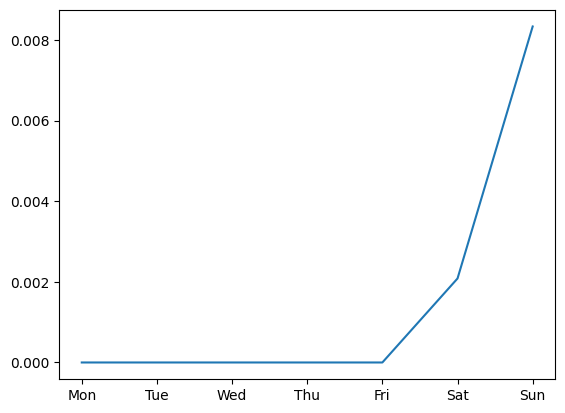

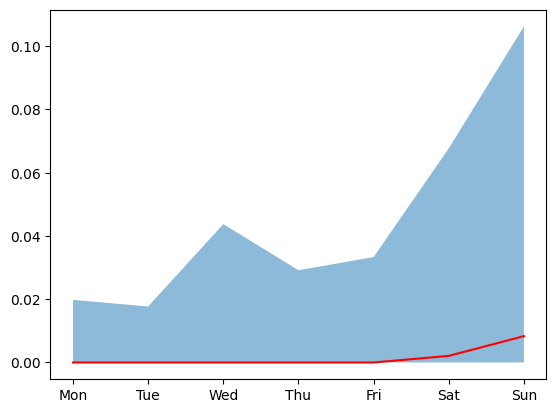

In [84]:
# [Advanced]
# To do this exercise, you'll have to know or look into how to reshape arrays.
#  Are Murphy's laws true? Does it rain more on weekends?

# 0. Look into docs of download_meteo_data(), and use it to download *precipitation data* from 2022,
# but change the end_date argument to be end_date="2022-12-30" to have a multiple of 7 days!

# 1. Compute daily averages of precipitation (you will get a 1D array of shape (n_days,))
timestamps_array, precipitation_array = download_meteo_data(data="precipitation", end_date="2022-12-30")
daily_averages = np.mean(precipitation_array, axis=1)
daily_averages.shape
# 2. Reshape the daily averages array to be of shape (n_weeks, n_weekdays=7)
reshaped_daily_averages = daily_averages.reshape(-1, 7)
reshaped_daily_averages.shape
# 3. Take the average over the n_weeks dimension and plot median precipitation for each weekday!
plt.plot(np.median(reshaped_daily_averages, axis=0))
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
# 4. Plot the average (bonus: fill in using std, or percentiles - in which case replace mean with median)
plt.fill_between(range(7), np.percentile(reshaped_daily_averages, 25, axis=0), np.percentile(reshaped_daily_averages, 75, axis=0), alpha=0.5)
plt.plot(np.median(reshaped_daily_averages, axis=0), c='red')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


#### 1.1.3

In [ ]:
# Go back to the RT data. Assume that w consider outliers the RTs longer than 0.7 seconds.
# Compute again the mean RTs after having excluded such outliers, but make sure you use only vector operations!

# (Hint: an easy way to exclude outliers without using loops is by setting nans in the matrix)


In [ ]:
# Find the index of the subject with the shortest trial reaction time of the whole dataset
# (not shortest average!)
# (Hint: you will need two operations...)



In [ ]:
# Use argmax to find the index of the warmest hour in the (non-reshaped) temperature_array.
# Then, use the index over timestamps_array to read out the corresponding timestamp.
timestamps_array, temperatures_array = download_meteo_data()

In [ ]:
# (Bonus: we did not do this in class!)
# We can use the np.argsort() function to produce the indexes array required to
# order an array in ascending or descending values.

# For example:
random_arr = np.array([0.1, 5, 3.4, 2.3])
ordering_idxs = np.argsort(random_arr)
random_arr[ordering_idxs]  # with this index, this is now ordered!

# Let's make a ranking of the 5 warmest hours of 2022!
# Sort the (non-reshaped) temperature array using the indexes produced by np.argsort.
# so that the first elements are the highest temperatures.
# Then sort the imestamps array with the same indexes, and take the first 5.
#
# Double check you match the result that you have got in the exercises above!